In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_excel("C:\\Users\\HP\\Downloads\\job_market_dataset.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1020 non-null   object 
 1   Salary Estimate    969 non-null    float64
 2   Job Description    1020 non-null   object 
 3   Rating             478 non-null    float64
 4   Company Name       969 non-null    object 
 5   Location           1020 non-null   object 
 6   Headquarters       1020 non-null   object 
 7   Size               1020 non-null   object 
 8   Founded            510 non-null    float64
 9   Type of ownership  1020 non-null   object 
 10  Industry           970 non-null    object 
 11  Sector             1020 non-null   object 
 12  Revenue            1020 non-null   object 
 13  Competitors        767 non-null    object 
dtypes: float64(3), object(11)
memory usage: 111.7+ KB


In [4]:
df = data.drop("Size", axis=1) # or columns='Column2'


In [5]:
print(df.dtypes)

Job Title             object
Salary Estimate      float64
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object


In [6]:
df.shape

(1020, 13)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1020 non-null   object 
 1   Salary Estimate    969 non-null    float64
 2   Job Description    1020 non-null   object 
 3   Rating             478 non-null    float64
 4   Company Name       969 non-null    object 
 5   Location           1020 non-null   object 
 6   Headquarters       1020 non-null   object 
 7   Founded            510 non-null    float64
 8   Type of ownership  1020 non-null   object 
 9   Industry           970 non-null    object 
 10  Sector             1020 non-null   object 
 11  Revenue            1020 non-null   object 
 12  Competitors        767 non-null    object 
dtypes: float64(3), object(10)
memory usage: 103.7+ KB
None


In [8]:

print(df.describe())


       Salary Estimate  Rating  Founded
count       969.000000   478.0    510.0
mean     119115.341589     4.5   1921.0
std       34173.900906     0.0      0.0
min       60060.000000     4.5   1921.0
25%       89402.000000     4.5   1921.0
50%      117134.000000     4.5   1921.0
75%      147263.000000     4.5   1921.0
max      179797.000000     4.5   1921.0


In [9]:
#Check missing values
df.isnull().sum()

Job Title              0
Salary Estimate       51
Job Description        0
Rating               542
Company Name          51
Location               0
Headquarters           0
Founded              510
Type of ownership      0
Industry              50
Sector                 0
Revenue                0
Competitors          253
dtype: int64

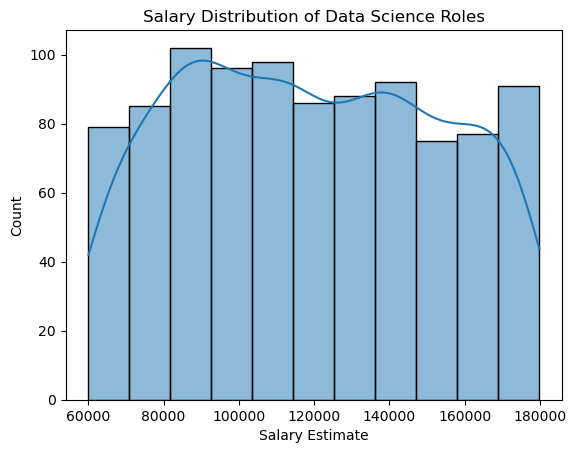

In [10]:
sns.histplot(df['Salary Estimate'], kde=True)
plt.title("Salary Distribution of Data Science Roles")
plt.show()

<Axes: >

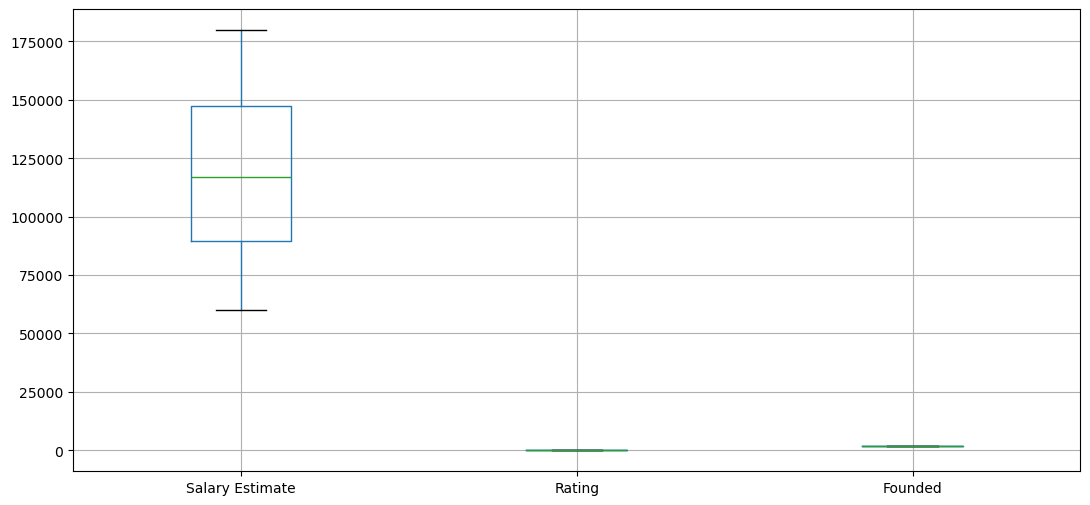

In [11]:
df.boxplot(figsize=(13,6))

In [12]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean()) 
df['Founded'] = df['Founded'].fillna(df['Founded'].mean())
df['Company Name'] = df['Company Name'].fillna(df['Company Name'].mode()[0])
df['Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])
df['Competitors'] = df['Competitors'].fillna(df['Competitors'].mode()[0])

In [13]:
#drop missing values in target(Salary Estimate)
df=df.dropna(subset='Salary Estimate')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 1 to 1019
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          969 non-null    object 
 1   Salary Estimate    969 non-null    float64
 2   Job Description    969 non-null    object 
 3   Rating             969 non-null    float64
 4   Company Name       969 non-null    object 
 5   Location           969 non-null    object 
 6   Headquarters       969 non-null    object 
 7   Founded            969 non-null    float64
 8   Type of ownership  969 non-null    object 
 9   Industry           969 non-null    object 
 10  Sector             969 non-null    object 
 11  Revenue            969 non-null    object 
 12  Competitors        969 non-null    object 
dtypes: float64(3), object(10)
memory usage: 106.0+ KB


In [15]:
X = df.drop(['Salary Estimate', 'Job Description'], axis=1)  # drop target + free-text # Define Features (X) and Target (y)
y = df['Salary Estimate']

In [16]:
X_encoded = pd.get_dummies(X, drop_first=True) # Encode Categorical Columns

In [17]:
from sklearn.model_selection import train_test_split       # Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [19]:
# Predict
y_pred = rfr.predict(X_test)

In [20]:
# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 1254000343.8019683
R² Score: -0.14546459140440438


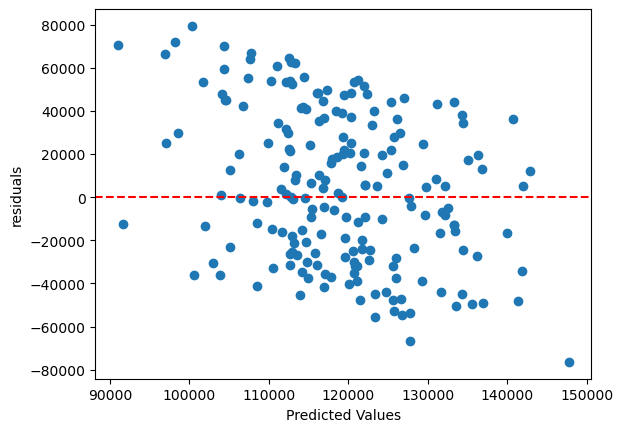

In [21]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("residuals")
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Suppose y_train, y_test are actual values
# y_pred = model.predict(X_test) from RandomForestRegressor

# Standard regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Custom metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100   # Mean Absolute % Error
accuracy_like = 100 - mape   # "Accuracy" in % terms (how close predictions are)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAPE:", mape, "%")
print("Accuracy-like metric:", accuracy_like, "%")


MAE: 30038.230035223365
MSE: 1254000343.8019683
RMSE: 35411.86727358455
R² Score: -0.14546459140440438
MAPE: 26.149849355271314 %
Accuracy-like metric: 73.85015064472869 %


### Ridge Regression (L2 Regularization)

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


### Random Forest Regressor (Strong Model)

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


### Gradient Boosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


### XGBoost Regressor 

In [27]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


## Model Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_test, y_pred):
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }


## Train Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

## Create predictions

In [33]:
y_pred_lr = lr.predict(X_test)


### Lasso Regression

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

#### generate the prediction

In [36]:
y_pred_lasso = lasso.predict(X_test)


### Compare All Models

In [37]:
results = []

results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Ridge Regression", y_test, y_pred_ridge))
results.append(evaluate_model("Lasso Regression", y_test, y_pred_lasso))
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results.append(evaluate_model("Gradient Boosting", y_test, y_pred_gbr))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))

results_df = pd.DataFrame(results)
results_df.sort_values(by="R2 Score", ascending=False)


,Model,MAE,RMSE,R2 Score
1,Ridge Regression,30050.754893,34688.282213,-0.099131
2,Lasso Regression,30063.549972,34712.575461,-0.100671
5,Gradient Boosting,30376.593249,35363.107858,-0.142312
4,Random Forest,30078.482158,35397.868302,-0.144559
6,XGBoost,32740.024887,39935.714934,-0.456824
3,Decision Tree,43156.592784,51200.258078,-1.394574
0,Linear Regression,123645.659794,127996.100681,-13.965027


In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

<Axes: title={'center': 'Feature Importance'}>

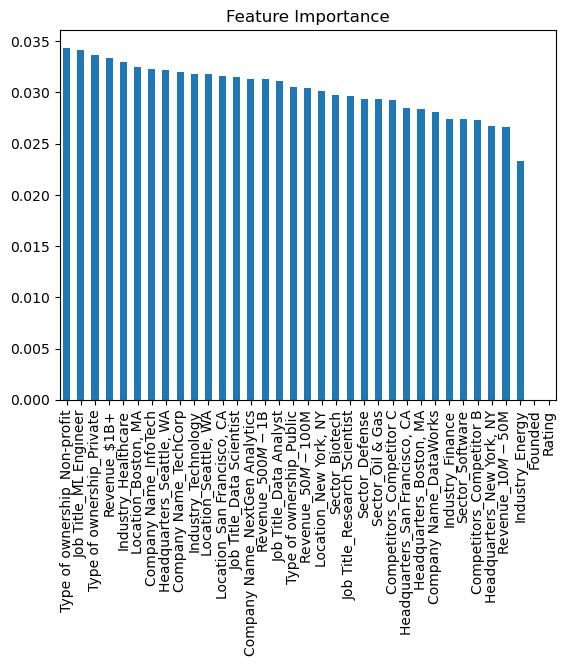

In [44]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', title='Feature Importance')


### Hyperparameter Tuning – Random Forest

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid = GridSearchCV(
    rf,
    rf_params,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


### Evaluate Tuned RF

In [46]:
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("Tuned RF R2:", r2_score(y_test, y_pred_rf_tuned))
print("Tuned RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))


Tuned RF R2: -0.12138770572198831
Tuned RF RMSE: 35037.72410579667


### Hyperparameter Tuning – Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0]
}

gbr_grid = GridSearchCV(
    gbr,
    gbr_params,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

gbr_grid.fit(X_train, y_train)

print("Best GBR Parameters:", gbr_grid.best_params_)


Best GBR Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


### Evaluate Tuned GBR

In [48]:
best_gbr = gbr_grid.best_estimator_
y_pred_gbr_tuned = best_gbr.predict(X_test)

print("Tuned GBR R2:", r2_score(y_test, y_pred_gbr_tuned))
print("Tuned GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuned)))


Tuned GBR R2: -0.10165792576286936
Tuned GBR RMSE: 34728.12811734461


### Final Model Selection

In [49]:
final_results = pd.DataFrame({
    "Model": ["Tuned Random Forest", "Tuned Gradient Boosting"],
    "R2 Score": [
        r2_score(y_test, y_pred_rf_tuned),
        r2_score(y_test, y_pred_gbr_tuned)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuned))
    ]
})

final_results


,Model,R2 Score,RMSE
0,Tuned Random Forest,-0.121388,35037.724106
1,Tuned Gradient Boosting,-0.101658,34728.128117


## Save The Best Model

In [50]:
import joblib

joblib.dump(best_gbr, "salary_prediction_model.pkl")


['salary_prediction_model.pkl']

In [51]:
import streamlit as st
import joblib
import numpy as np

model = joblib.load("salary_prediction_model.pkl")

st.title("💼 Data Scientist Salary Predictor")

experience = st.selectbox("Experience Level", [0, 1, 2, 3])
employment = st.selectbox("Employment Type", [0, 1, 2])
company_size = st.selectbox("Company Size", [0, 1, 2])

if st.button("Predict Salary"):
    prediction = model.predict([[experience, employment, company_size]])
    st.success(f"Predicted Salary: ₹ {prediction[0]:,.2f}")


2025-12-17 20:06:01.408 
  command:

    streamlit run C:\Users\HP\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-17 20:06:01.409 Session state does not function when running a script without `streamlit run`


In [53]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


###### Multiple regression models were implemented and optimized using GridSearchCV. Ensemble models showed superior performance, and the final tuned model was deployed using Streamlit for real-time salary prediction.

In [54]:
import streamlit as st
import joblib
import numpy as np

model = joblib.load("salary_prediction_model.pkl")

st.title("💼 Data Scientist Salary Predictor")

experience = st.selectbox("Experience Level", [0, 1, 2, 3])
employment = st.selectbox("Employment Type", [0, 1, 2])
company_size = st.selectbox("Company Size", [0, 1, 2])

if st.button("Predict Salary"):
    prediction = model.predict([[experience, employment, company_size]])
    st.success(f"Predicted Salary: ₹ {prediction[0]:,.2f}")


In [55]:
cd path_to_your_project_folder


[WinError 2] The system cannot find the file specified: 'path_to_your_project_folder'
C:\Users\HP


In [56]:
dir


<function dir>